In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Mở file phân tích

In [3]:
activity_df = pd.read_csv('data_processed/activity_periods.csv')
activity_df['min'] = pd.to_datetime(activity_df['min'])
activity_df['max'] = pd.to_datetime(activity_df['max'])
activity_df['month_year'] = activity_df['min'].dt.to_period('M')

C:\Users\admin\AppData\Local\Temp\ipykernel_7896\2129230215.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  activity_df['month_year'] = activity_df['min'].dt.to_period('M')


tổng số hoạt động theo tác giả và theo tháng(chuẩn bị dữ liệu cho đồ thị)

In [4]:
total_activity_author = activity_df.groupby('author')['activity_duration'].sum().sort_values(ascending=False)
total_activity_monthly = activity_df.groupby('month_year')['activity_duration'].sum()

hoạt động theo tháng

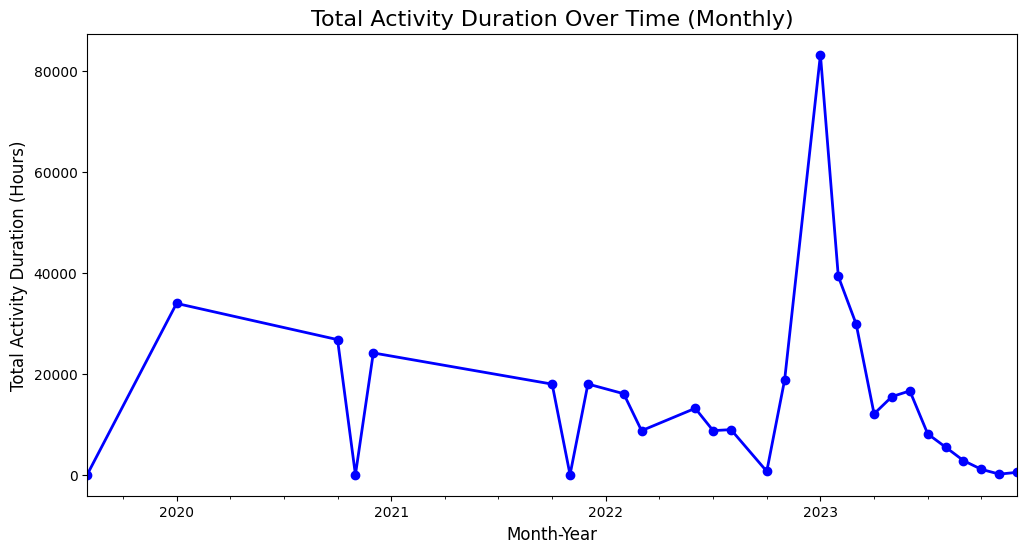

In [5]:
plt.figure(figsize=(12, 6))
total_activity_monthly.plot(kind='line', marker='o', color='b', linewidth=2)
plt.title("Total Activity Duration Over Time (Monthly)", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Total Activity Duration (Hours)", fontsize=12)
plt.show()

phân phối thời gian hoạt động 

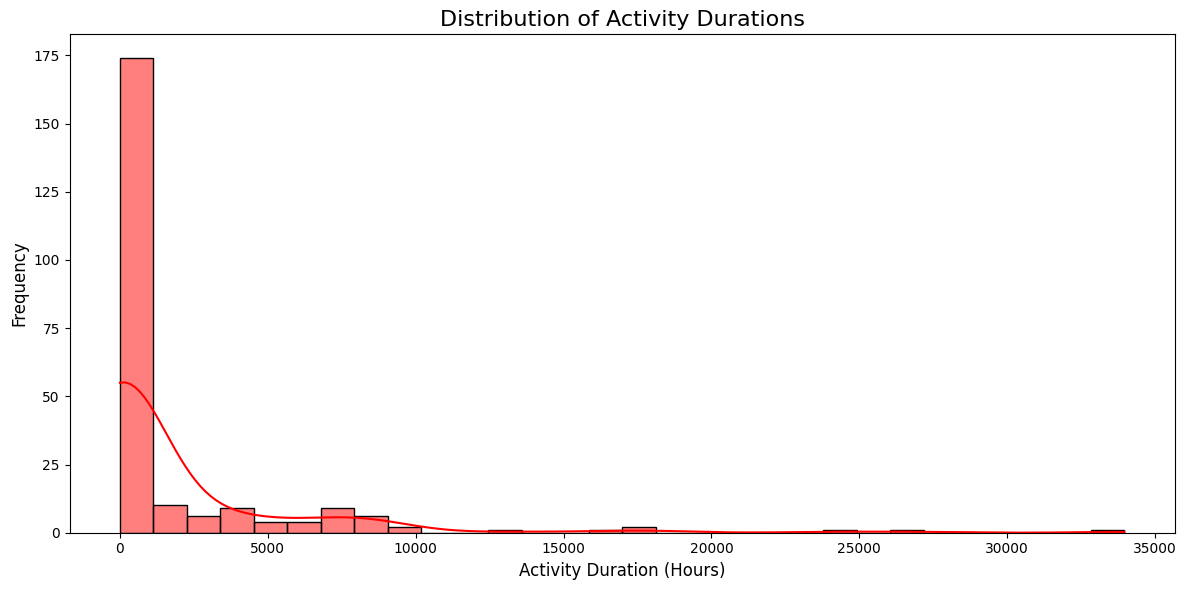

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(activity_df['activity_duration'], bins=30, kde=True, color='red')
plt.title("Distribution of Activity Durations", fontsize=16)
plt.xlabel("Activity Duration (Hours)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

top 20 người hoạt động chăm chỉ nhất

C:\Users\admin\AppData\Local\Temp\ipykernel_7896\2395928428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_author_most_active.values, y=top_20_author_most_active.index, palette='viridis', ax=ax)


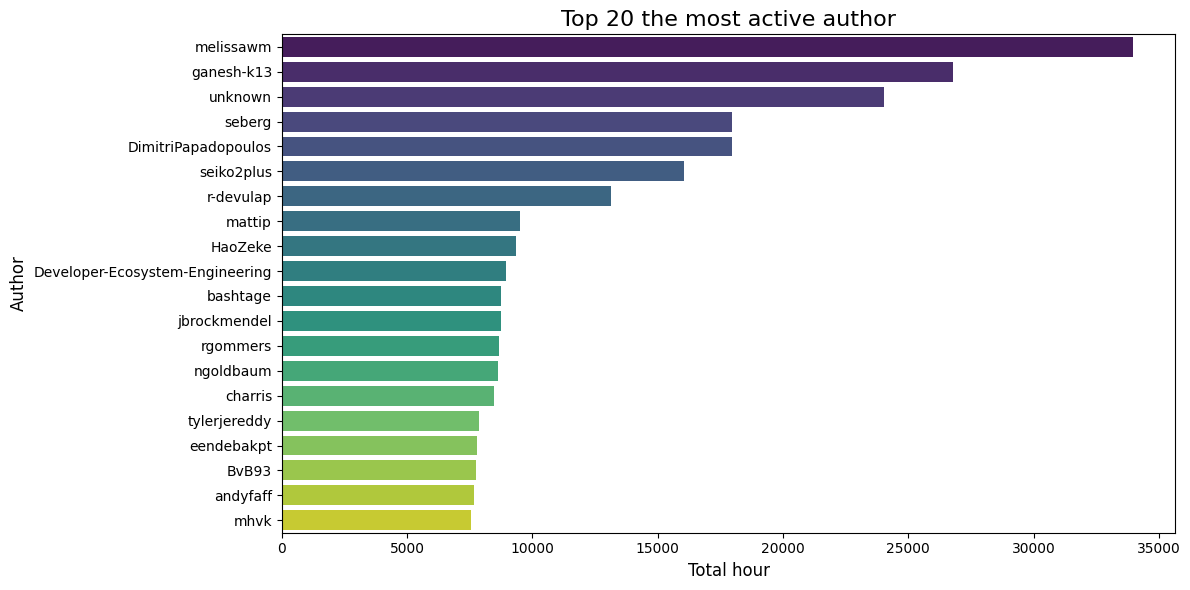

In [7]:
top_20_author_most_active = total_activity_author.head(20)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_20_author_most_active.values, y=top_20_author_most_active.index, palette='viridis', ax=ax)
ax.set_title("Top 20 the most active author", fontsize=16)
ax.set_xlabel("Total hour", fontsize=12)
ax.set_ylabel("Author", fontsize=12)
plt.tight_layout()
plt.show()

Tần suất hoạt động của giờ trong ngày và ngày trong tuần

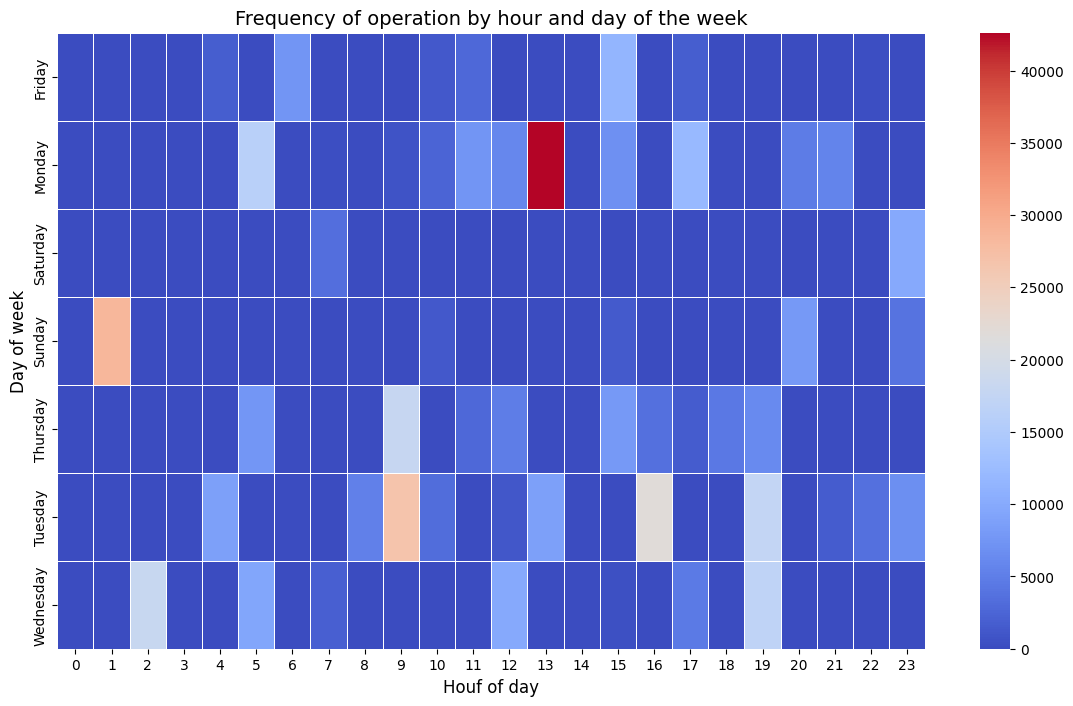

In [9]:
activity_df['hour'] = activity_df['min'].dt.hour
activity_df['weekday'] = activity_df['min'].dt.day_name()
activity_heatmap = activity_df.pivot_table(values='activity_duration', index='weekday', columns='hour', aggfunc='sum').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(activity_heatmap, cmap='coolwarm', annot=False, fmt='.1f', linewidths=0.5)
plt.title('Frequency of operation by hour and day of the week', fontsize=14)
plt.xlabel('Houf of day', fontsize=12)
plt.ylabel('Day of week', fontsize=12)
plt.show()